In [62]:
#-------------------------------
# Import Modules
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import dates as mpl_dates
import matplotlib.dates as mdates
#-------------------------------

# Bitcoin Velocity
The velocity of money represents the rate of which money is exchanged, it's an important measure especially in bitcoin becuase to do a transaction on the bitcoin blockchain it has real world cost (fees) so daily transactions represent the health of the bitcoin economy. 

- A weak bitcoin economy would be low velocity meaning user's are not exchanging or using bitcoin
- A strong bitcoin economy user's will be exchanging, participating in daily transactions.

### Economists use Velocity to measure money in the U.S Economy 
Formula:
        
$V_T = \frac{P_T T_T}{M_T}$

Where:

- $V_T =$ Velocity of money for all transactions at a given time $_T$
- $P_T =$ Price level at time $_T$
- $T_T =$ aggregate real value of transactions at time $_T$
- $M_T =$ total nominal amount of money in circulation at time $_T$

### How we will try to measure Velocity in the Bitcoin Economy
Formula:

$V_T = \frac{P_T TV_T}{M_T}$

Where:
- $V_T =$ Velocity of bitcoin for all non-exchange (off chain) transactions at a given time $_T$
- $P_T =$ Price level of bitcoin at time $_T$
- $TV_T =$ Value of transactions at time $_T$
- $M_T =$ Total value of bitcoin in circulation at time $_T$

In [63]:
#-------------------------------
# Import Data
#-------------------------------
mkt_cap = pd.read_csv("./Data/market-cap.csv")
mkt_cap = mkt_cap.set_index('Date')
tx_vol = pd.read_csv("./Data/transaction-volume.csv")
tx_vol = tx_vol.set_index('Date')
#-------------------------------
# Data prep
#-------------------------------
# Matching Dates & Values
matched_dates = []
matched_mkt_cap = []
matched_tx_vol = []
for date in mkt_cap.index:
    if date in tx_vol.index:
        matched_dates.append(date)
        matched_tx_vol.append(tx_vol['Volume'].loc[date])
        matched_mkt_cap.append(mkt_cap['market-cap'].loc[date])
# New dataframe with matched dates & values
cleaned_list = pd.DataFrame({
    'Date': matched_dates,
    'Volume': matched_tx_vol,
    'Market Cap': matched_mkt_cap
})
# Print sample
print(cleaned_list.head())
#-------------------------------
# Deriving Velocity
#-------------------------------
velocity = []
for val in range(len(cleaned_list['Date'])):
    velocity.append((cleaned_list['Volume'].loc[val] / cleaned_list['Market Cap'].loc[val])*100)

         Date       Volume  Market Cap
0  2010-09-27  1638.513967    247413.0
1  2010-09-30  1818.841099    248763.0
2  2010-10-03  2367.264970    250086.0
3  2010-10-06  2618.045450    251415.0
4  2010-10-09  3137.729663    421230.0


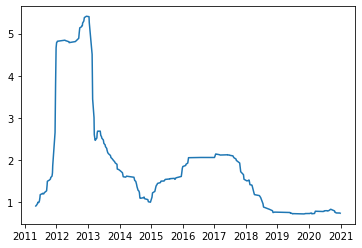

In [76]:
#-------------------------------
date_format = mpl_dates.DateFormatter('%Y-%m-%d')
years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y')

cleaned_list.Date = pd.to_datetime(cleaned_list.Date)

x = cleaned_list.Date[29:]
y = velocity
window_size = 30
i = 0
velocity_30_avg = []
while i < len(y) - window_size + 1:
    this_window = y[i: i + window_size]
    window_avg = sum(this_window) / window_size
    velocity_30_avg.append(window_avg)
    i += 1
fig, ax = plt.subplots()
ax.plot(x,velocity_30_avg)
ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis_date()
#-------------------------------

# Result:
 - We can see the actual bitcoin economy is hurting right now, yes bitcoin prices are as high as ever but who is actually using bitcoin? looks like no one.